In [258]:
import torch
import os
import torchvision
from torch.utils.data import Dataset, Subset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
DATAPATH = '/mnt/NeuralNetworksDL/coco/'


In [259]:
class cocoDataSet(Dataset):
    def __init__(self, data_dir, size=5000, transform=None):
        self.data_dir = data_dir
        self.size = size
        self.filenames = os.listdir(data_dir)
        self.transform = transform

    def __len__(self):
        return self.size

    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()
        # __getitem__ actually reads the img content
        colored = torchvision.io.read_image(self.data_dir + self.filenames[index]).to(torch.float32) / 255
        if self.transform:
            colored = self.transform(colored)
        grayscale = torchvision.transforms.functional.rgb_to_grayscale(colored)
        return colored, grayscale


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train_dataset.__len__() = 98540
valid_dataset.__len__() = 24636


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


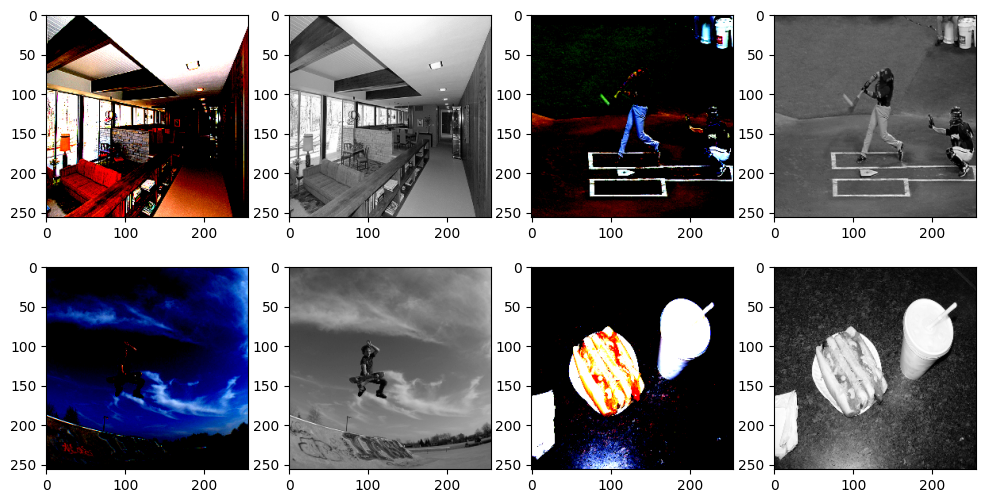

In [263]:
# ImageNet normalization, Resizing to 256 x 256
cocoData = cocoDataSet(DATAPATH,
                       size=123176,
                       transform=torchvision.transforms.Compose([
                           torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                                            std=(0.229, 0.224, 0.225)),
                           torchvision.transforms.Resize((256, 256))]))
n_val = int(0.2 * len(cocoData)) + 1
idx = torch.randperm(len(cocoData))
# custom DataSet split: https://stackoverflow.com/a/61627600
train_dataset = Subset(cocoData, idx[:-n_val])
valid_dataset = Subset(cocoData, idx[-n_val:])
print(f'{train_dataset.__len__() = }\n{valid_dataset.__len__() = }')
plt.figure(figsize=(12, 6))
for i in range(0, 7, 2):
    plt.subplot(2, 4, i + 1)
    idx = np.random.randint(0, len(train_dataset))
    img = train_dataset[idx][0]
    plt.imshow(img.permute(1, 2, 0))
    plt.subplot(2, 4, i + 2)
    img = train_dataset[idx][1]
    plt.imshow(img.permute(1, 2, 0), 'gray')
plt.show()


In [264]:
BATCH_SIZE = 130
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
print(len(train_dataset) / len(train_loader))

130.0
